<a href="https://colab.research.google.com/github/sadikinisaac/waste/blob/master/waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving waste.csv to waste.csv


In [0]:
import pandas as pd # the pd is by convention
import numpy as np # as is the np

import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

In [7]:
import io
data = pd.read_csv(io.BytesIO(uploaded['waste.csv']))

data.head()

,year,waste_disposed_of,waste_recycled
0,2000,2.80,1.86
1,2001,2.80,2.23
2,2002,2.63,2.18
3,2003,2.51,2.22
4,2004,2.48,2.31


In [8]:
data.describe()

,year,waste_disposed_of,waste_recycled
count,15.000000,15.000000,15.000000
mean,2007.000000,2.717333,3.148667
std,4.472136,0.184254,0.964942
min,2000.000000,2.480000,1.860000
25%,2003.500000,2.565000,2.270000
50%,2007.000000,2.630000,3.030000
75%,2010.500000,2.830000,3.900000
max,2014.000000,3.040000,4.830000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
year                 15 non-null int64
waste_disposed_of    15 non-null float64
waste_recycled       15 non-null float64
dtypes: float64(2), int64(1)
memory usage: 488.0 bytes


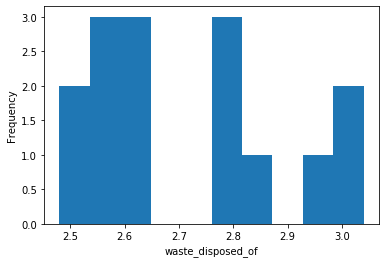

In [10]:
data['waste_disposed_of'].plot.hist()
plt.xlabel("waste_disposed_of");

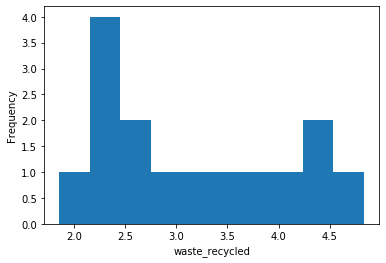

In [11]:
data['waste_recycled'].plot.hist()
plt.xlabel("waste_recycled");

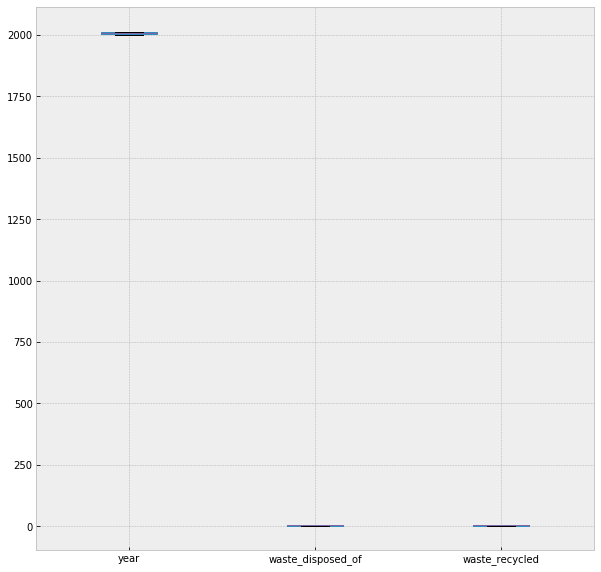

In [12]:
plt.style.use('bmh')

data.boxplot(figsize=[10,10]) # creating boxplot
plt.savefig('box.png')

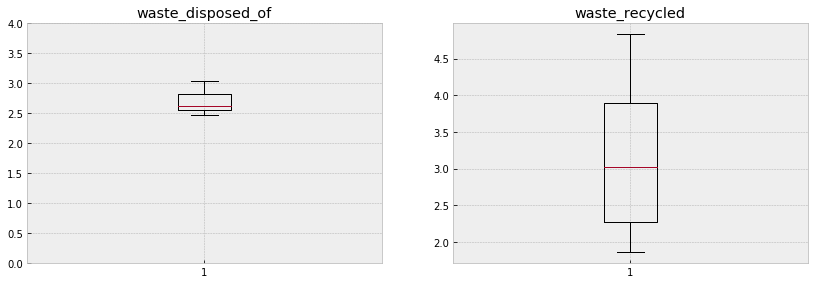

In [15]:
plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(data['waste_disposed_of'])
plt.ylim(0,4)
plt.title('waste_disposed_of')

plt.subplot(3,2,2)
plt.boxplot(data['waste_recycled'])
plt.title('waste_recycled')

plt.show()

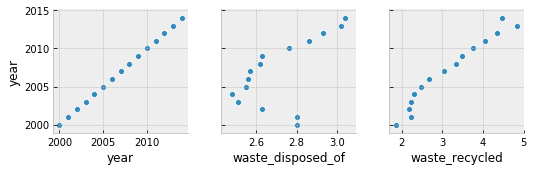

In [16]:
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['year'])

In [17]:
data.corr()

,year,waste_disposed_of,waste_recycled
year,1.000000,0.603322,0.976911
waste_disposed_of,0.603322,1.000000,0.721157
waste_recycled,0.976911,0.721157,1.000000


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [0]:
X = data.drop('waste_disposed_of',axis=1)
Y = data['waste_disposed_of']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
LR = LinearRegression()

In [24]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred = LR.predict(xtest)

In [0]:
import sklearn.metrics as metrics

In [27]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  -0.06342669901953824


In [28]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  0.07856037629199386


In [29]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  0.008474181507811929


In [30]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  0.09205531765092079


In [0]:
#the linear reg for waste_disposed_of is insignificant

In [0]:
X = data.drop('waste_recycled',axis=1)
Y = data['waste_recycled']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
LR = LinearRegression()

In [37]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred = LR.predict(xtest)

In [0]:
import sklearn.metrics as metrics

In [40]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.9491778088992511


In [41]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  0.11174517048323762


In [42]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  0.013272215205960575


In [43]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  0.11520510060739748


In [0]:
#the linear reg for waste_recycled with R=0.949 which is significant

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
#decision tree

DT = DecisionTreeRegressor()

In [46]:
DT.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
pred = DT.predict(xtest)

In [0]:
import sklearn.metrics as metrics

In [49]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.6726019529006322


In [50]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  0.28499999999999986


In [51]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  0.08549999999999991


In [0]:
#Grid Search for Hyper Parameter

from sklearn.model_selection import GridSearchCV

In [0]:
Dt = DecisionTreeRegressor()

In [54]:
parameter ={'max_depth':np.arange(1,10)}
GS=GridSearchCV(DT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
GS.best_params_

{'max_depth': 4}

In [0]:
DT = DecisionTreeRegressor(max_depth=4)

In [58]:
DT.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
pred = DT.predict(xtest)

In [60]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.6726019529006322


In [61]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  0.28499999999999986


In [62]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  0.08549999999999991


In [63]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  0.29240383034426876


In [64]:
print('Bias Error')
print('Actual value :',np.mean(ytest))
print('Predicted value :',np.mean(pred))

Bias Error
Actual value : 2.93
Predicted value : 2.78


In [65]:
print('Variance Error')
print('Actual value :',np.var(ytest,ddof=1))
print('Predicted value :',np.var(pred,ddof=1))

Variance Error
Actual value : 0.34820000000000007
Predicted value : 0.655133333333333


In [0]:
#random forest

RT = RandomForestRegressor()

In [67]:
RT.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
pred = RT.predict(xtest)

In [69]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.9502297530155085


In [70]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  0.10999999999999988


In [71]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  0.012997499999999955


In [72]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  0.11400657875754344


In [0]:
#Grid Search for Hyper Parameter

RT = RandomForestRegressor()

In [74]:
parameter ={'max_depth':np.arange(1,10),'n_estimators':np.arange(1,15)}
GS=GridSearchCV(RT,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4,

In [75]:
GS.best_params_

{'max_depth': 4, 'n_estimators': 1}

In [0]:
RT = RandomForestRegressor(n_estimators=9,max_depth=7)

In [77]:
RT.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [0]:
pred = RT.predict(xtest)

In [79]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.9104790539470482


In [80]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  0.1277777777777775


In [81]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  0.023378395061728362


In [82]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  0.15289995115018304


In [84]:
print('Bias Error')
print('Actual value :',np.mean(ytest))
print('Predicted value :',np.mean(pred))

Bias Error
Actual value : 2.93
Predicted value : 2.8733333333333326


In [85]:
print('Variance Error')
print('Actual value :',np.var(ytest,ddof=1))
print('Predicted value :',np.var(pred,ddof=1))

Variance Error
Actual value : 0.34820000000000007
Predicted value : 0.5031119341563782


In [0]:
#Random forest has given a better R squared score than the Decision tree.

#But both the bias error as well as variance error has increased a little. 